## For this tutorial, we will be learning how to plot gravitation wave signals using the parameters provided by the LIGO fact sheets. 

1. GW190814 (https://dcc.ligo.org/public/0168/G2000846/002/GW190814%20Factsheet.pdf)
2. GW170814 (https://dcc.ligo.org/public/0145/G1701862/011/GW170814-FactSheet.pdf)
3. GW150914 (https://www.ligo.org/detections/GW150914/fact-sheet.pdf)

## Installations needed:
1. PyCBC (https://pycbc.org/pycbc/latest/html/install.html)
2. GWpy  (https://gwpy.github.io/docs/stable/install/)

In [ ]:
#pip install pycbc
#python -m pip install gwpy

# Generating waveforms in time-domain

In [2]:
#imports
import pylab
from pycbc.waveform import get_td_waveform
from gwpy.timeseries import TimeSeries
from scipy.signal import get_window
import matplotlib.pyplot as plt
%matplotlib inline

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


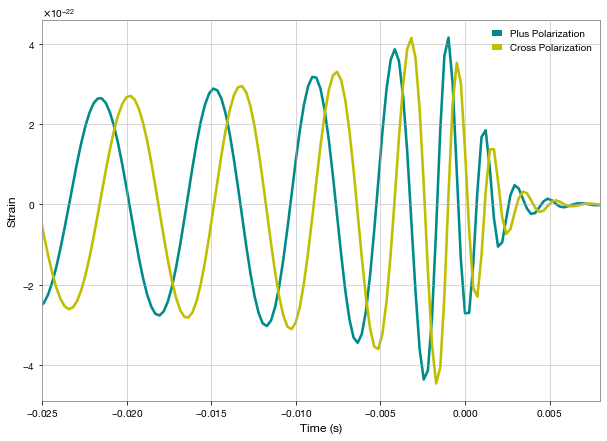

In [7]:
#--Plotting the gravitational wave plus and cross polarizations for GW190814 
hp, hc = get_td_waveform(approximant="IMRPhenomPv3HM", #waveform model
                        mass1=23.2, #[solar mass]
                        mass2=2.6,
                        spin1z=0.002, 
                        spin2z=-0.02,
                        distance = 241, #Mpc
                        f_lower=40, #lower frequency
                        delta_t=1.0/4096)#time step

plt.plot(hp.sample_times, hp, label="Plus Polarization" , linewidth=2.58, color = 'darkcyan' )
plt.plot(hp.sample_times, hc, label="Cross Polarization" , linewidth=2.58, color = 'y' )


plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.rcParams["figure.figsize"] = [10,7]
plt.xlim([-0.025,0.008]) #zoom in near merger time
#plt.xlim([-0.3,0.05]) 
plt.legend(frameon=False);

Gravitational waves are transverse waves that have two independent polarization states denoted by h+ (plus) and hx (cross). These polarizations are responsible for the stretching and squeezing! 

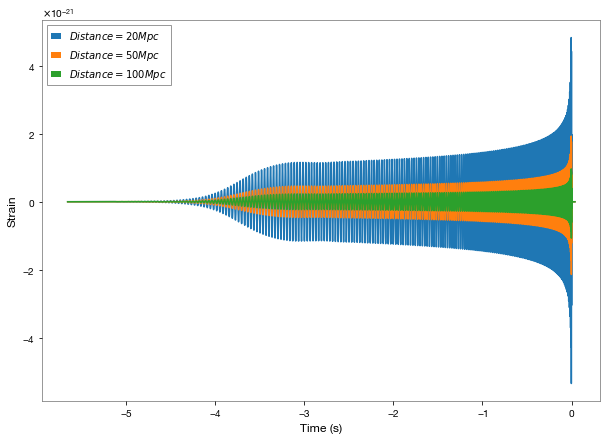

In [8]:
#--See how the waveform changes with distance
for x in [20, 50, 100]:
    hp, hc = get_td_waveform(approximant="IMRPhenomPv3HM",
                         mass1=23.2,
                         mass2=2.6,
                         spin1z=0.002,
                         spin2z=-0.02,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=x)
    
    pylab.plot(hp.sample_times, hp, label='$Distance=%sMpc$' % x)
pylab.legend()
pylab.grid()
pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.show()

# Plotting 3 gravitational wave signals using LIGO fact sheet

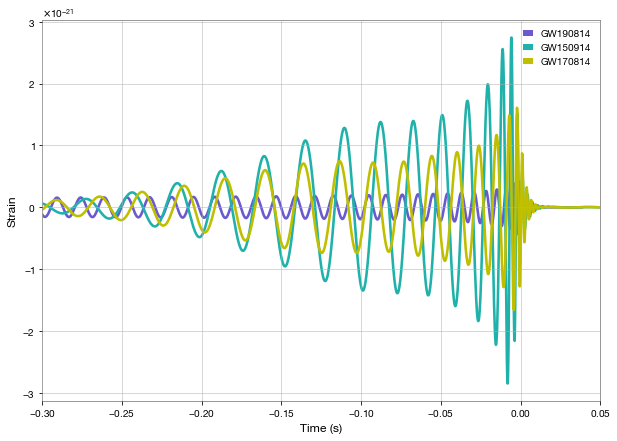

In [10]:
#--Parameters from GW190814,GW170814,GW150914 fact sheet
hp, hc = get_td_waveform(approximant="IMRPhenomPv3HM", 
                        mass1=23.2, 
                        mass2=2.6,
                        spin1z=0.002,
                        spin2z=-0.02,
                        distance = 241,
                        f_lower=40, 
                        delta_t=1.0/4096)
sp, sc = get_td_waveform(approximant="IMRPhenomPv3HM", 
                        mass1=32,
                        mass2=25,
                        spin1z=0.6,
                        spin2z=-0.8,
                        distance = 230, 
                        f_lower=40, 
                        delta_t=1.0/4096)
vp, vc = get_td_waveform(approximant="IMRPhenomPv3HM", 
                        mass1=28,
                        mass2=21,
                        distance = 337, 
                        f_lower=40, 
                        delta_t=1.0/4096)


plt.plot(hp.sample_times, hp, label="GW190814" , linewidth=2.58, color = 'slateblue' )
plt.plot(sp.sample_times, sp, label="GW150914" , linewidth=2.58, color = 'lightseagreen' )
plt.plot(vp.sample_times, vp, label="GW170814" , linewidth=2.58, color = 'y' )

plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.rcParams["figure.figsize"] = [10,7]
plt.xlim([-0.3,0.05]) 
plt.legend(frameon=False);

### What does this plot tell us?
Binary black hole mergers have 3 different stages: inspiral, merger, and ringdow. From this plot, we can see that the inspiral is roughly from -0.20s to nearly 0s. A little before 0s, the binary black hole merges and then it reaches ringdown, the final stage. The ringdown is the final signal of the black hole. It's worth mentioning that the final mass of the black hole is roughly the same mass of the two black holes, despite losing some energy (carried by gravitational waves).

We note that these three gravitational wave signals have a diverse range of amplitudes. The amplitude, as shown in the previous exercise, depends on the distance of the signal. More massive signals produce louder gravitational waves. One last note about amplitudes is that it also depends on the sky location and inclination (which was the binary is facing).

# Generating waveforms in frequency-domain

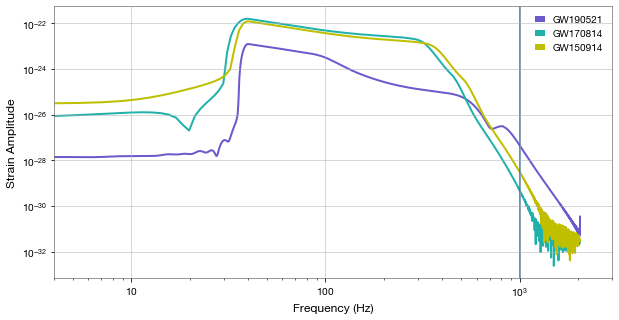

In [21]:
#Frequency domain data using Fourier transform.

#create timeseries for the waveform
model_waveform_serieshp = TimeSeries(hp, unit = '', sample_rate = 4096)
model_waveform_seriessp = TimeSeries(sp, unit = '', sample_rate = 4096)
model_waveform_seriesvp = TimeSeries(vp, unit = '', sample_rate = 4096)

#apply a window function to timedomain
windowhp = get_window(('tukey', (0.1)), model_waveform_serieshp.size)
windowsp = get_window(('tukey', (0.1)), model_waveform_seriessp.size)
windowvp = get_window(('tukey', (0.1)), model_waveform_seriesvp.size)

series_with_windowhp = model_waveform_serieshp * windowhp
series_with_windowsp = model_waveform_seriessp * windowsp
series_with_windowvp = model_waveform_seriesvp * windowvp

fft_amplitudehp = series_with_windowhp.fft().abs()
fft_amplitudesp = series_with_windowsp.fft().abs()
fft_amplitudevp = series_with_windowvp.fft().abs()


plt.plot(fft_amplitudehp.frequencies.value, fft_amplitudehp.value,label='GW190521', color='slateblue',  linewidth=2)
plt.plot(fft_amplitudesp.frequencies.value, fft_amplitudesp.value,label='GW170814', color='lightseagreen',  linewidth=2)
plt.plot(fft_amplitudevp.frequencies.value, fft_amplitudevp.value,label='GW150914', color='y',  linewidth=2)
plt.axvline(x=1000)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Strain Amplitude')
plt.rcParams["figure.figsize"] = [10,5]
plt.legend(frameon=False,fontsize = 'medium')
plt.xlim([4,3E3])
plt.show()

### What does this plot tell us?

In this graph we will be focusing on the signal between 30-1000 Hz. Anything not between this frequency is just an artifact of the window function. We have converted our time domain signal into the frequency domain which is helpful when looking at the different modes of a signal. As we can see, GW150914 and GW170814 clearly show the dominant (2,2) mode at the merger, ~300 Hz. GW190521 on the other hand has an additional knee at around 800 Hz. We could potentially investigate to see if this is perhaps due to a higher order mode within the signal!